# Personal information


Name:Ashwin Manilal Patel



## Exercise 1: Linear regressions

In this exercise you'll work with (synthetic) data about basketball players starting their career in NBA.
File bb.csv contains generated data about basketball player statistics. Columns Height, CollagePointsaverage and Draftposition are to be used to predict the value in column Pointsaverage. 

First step is to read in the data, study its statistics and create a scatterplot illustrating the data.

In second step create a linear model that uses all features present in data to predict value for Pointsaverage.

In third step create a second order polynomial linear regression model that uses only one feature (Draftposition) to predict Pointsaverage. Compare $R^2$ with model created in step 2.

In fourth step create both unregularized (LinearRegression) and regularized (Ridge) polynomial models of degrees 1..40. Record the $R^2$ scores for both models (both training and test), and make a plot of them where x-axis is the degree of the polynomial and y-axis $R^2$.

In all the modeling steps, remember to scale the data and split the it  into training and test sets (size of test set 40% of all data samples). 

In [1]:
from nose.tools import *
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Step 1: read the data and plot

## Read the dataset (1p)

Print also basic statistics: means and stds for all columns.

In [2]:
#data = genfromtxt('bb.csv', names=True, delimiter=',', dtype=None) # use genfromtxt() with correct parameters
#labels = genfromtxt('bb.csv', delimiter=',', usecols=0, dtype=str)
#raw_data = np.genfromtxt('bb.csv', delimiter=',')[:,0:3]
#data = {label: row for label, row in zip(labels, raw_data)}
#print(data)
data = genfromtxt('bb.csv', delimiter=';', skip_header=1)
print(data)

[[2.300e+01 2.180e+02 1.200e+01 1.550e+01]
 [9.100e+00 2.110e+02 3.100e+01 6.000e+00]
 [2.240e+01 1.880e+02 4.100e+01 3.200e+00]
 [2.310e+01 1.880e+02 1.100e+01 1.660e+01]
 [1.690e+01 2.004e+02 3.200e+01 5.800e+00]
 [1.810e+01 1.846e+02 5.000e+01 1.500e+00]
 [1.970e+01 2.079e+02 6.000e+00 1.960e+01]
 [1.060e+01 2.196e+02 3.900e+01 3.200e+00]
 [1.740e+01 1.775e+02 8.000e+00 1.870e+01]
 [2.020e+01 1.973e+02 3.400e+01 5.200e+00]
 [1.190e+01 2.247e+02 4.000e+01 2.800e+00]
 [1.650e+01 2.180e+02 4.200e+01 2.500e+00]
 [1.220e+01 1.869e+02 8.000e+00 1.850e+01]
 [2.330e+01 2.130e+02 5.900e+01 3.000e-01]
 [1.470e+01 2.149e+02 3.900e+01 3.300e+00]
 [8.900e+00 1.804e+02 3.000e+00 2.220e+01]
 [6.300e+00 1.927e+02 2.300e+01 9.700e+00]
 [2.190e+01 1.894e+02 6.000e+01 7.000e-01]
 [2.470e+01 1.833e+02 6.000e+00 2.000e+01]
 [2.450e+01 2.074e+02 4.800e+01 1.500e+00]
 [1.970e+01 2.014e+02 5.900e+01 5.000e-01]
 [1.720e+01 2.151e+02 5.500e+01 5.000e-01]
 [2.420e+01 2.205e+02 4.900e+01 1.100e+00]
 [1.500e+01

In [3]:
ok_(data.shape[0]==100, "Wrong number of rows")
ok_(data.shape[1]==4, "Wrong number of columns")

In [4]:
# print means and stds
print("sample mean", np.mean(data), "sample std", np.std(data))
print("----------------------------------------------------------")
print("sample column mean", np.mean(data, axis=0), "sample column std", np.std(data, axis=0))

sample mean 64.17375 sample std 80.42948642094825
----------------------------------------------------------
sample column mean [ 15.672 200.979  32.33    7.714] sample column std [ 5.79023454 14.2326898  17.88354271  7.06171396]


## Plot features (1p)

Create a scatterplot showing the relation of all three features of the independent variable (Height, CollagePointsaverage and Draftposition) vs the dependent variable (Pointsaverage).

No handles with labels found to put in legend.


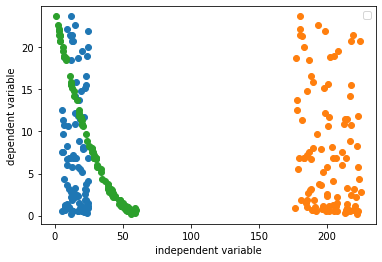

In [5]:
# plt.plot commands here
x = data[:, 0:3]
y = data[:, 3:]
plt.plot(x,y,'o')
#print(data)

plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.legend()
plt.show()

# Step 2: Create a linear model

## Scale data (1p)

In [6]:
scaler = StandardScaler().fit(x)
#scaler1 = StandardScaler().fit(y)
x = scaler.transform(x)
y = data[:, 3]
#print(y)
print("scaled x mean and std")
print(x.mean(axis=0))
print(x.std(axis=0))

scaled x mean and std
[ 1.57651669e-16 -6.88116231e-15  8.21565038e-17]
[1. 1. 1.]


## Split data into training and test sets (1p)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
#print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [8]:
ok_(x_train.shape[0]==60, "Number of training samples not ok")
ok_(x_test.shape[0]==40, "Number of test samples not ok")


## Linear model with all features (1p)

Create a linear model. Print out the training and test set $R^2$ scores.

In [9]:
model = LinearRegression().fit(x_train,y_train)#
#test_model = LinearRegression().fit(x_test,y_test)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))# print scores

0.9371444058674225
0.9367093173450586


# Step 3: 2nd order polynomial model with only 'DraftPosition' feature

## Transform data for polynomial fitting (1p)

In [10]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(data[:, 2].reshape(-1,1))

In [11]:
#print(x_poly.shape[0])
#print(x_poly.shape[1])
ok_(x_poly.shape[0] == 100, "Wrong number of rows")
ok_(x_poly.shape[1] == 3, "Wrong number of features")


## Scale

Scale the data. Verify that means and stds make sense.

In [12]:
scaler = StandardScaler().fit(x_poly)
x = scaler.transform(x_poly)
y = data[:, 3:]
print("scaled x mean and std")
print(x.mean(axis=0))
print(x.std(axis=0))
#print(x.std(axis=0)[0])
#print(x.std(axis=0)[1])

scaled x mean and std
[0.00000000e+00 8.21565038e-17 3.77475828e-17]
[0. 1. 1.]


In [13]:
ok_(x.std(axis=0)[0] == 0, "number of rows")
ok_(x.std(axis=0)[1] == 1, "number of features")

## Split into training and test sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

## Create model (1p)

Create model, fit it with the data, and print out training and test set $R^2$ scores.

In [15]:
model = LinearRegression().fit(x_train,y_train)#
#test_model = LinearRegression().fit(x_test,y_test)
print(model.score(x_train,y_train))# print scores
print(model.score(x_test,y_test))

0.9989313400084298
0.9986382733074031


## Plot model against data (1p)

Plot the data points as blue dots, and the model predictions as a line. 


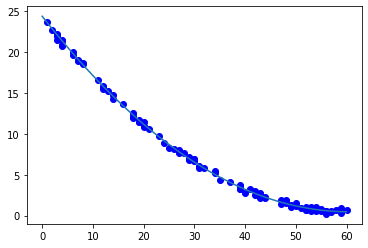

In [16]:
#plt.plot(x,y, 'bo')
#x = np.linspace(0, 10).reshape(-1,1)
#plt.plot(x, model.predict(x.reshape(-1,1)))
#plt.legend()
#plt.show()

plt.plot(data[:,2], data[:,3], 'bo')
xx = np.linspace(0, 60).reshape(-1,1)
plt.plot(xx, model.predict(scaler.transform(poly.fit_transform(xx))))

plt.show()

## Comparison with step 2 model

Compare $R^2$ with model created in step 2.



# Step 4: All features polynomial LinearRegression and Ridge models

In this step create both unregularized (LinearRegression) and regularized (Ridge) polynomial models of degrees 1..40. Record the $R^2$ scores for both models (both training and test), and make a plot of them where x-axis is the degree of the polynomial and y-axis $R^2$.

## Collect train and test scores for all degrees 1..40 for unregularized and regularized models (2p)

In [17]:
y = data[:,3]
x = data[:, [0,1,2]]
linregrTrainScores = []
linregrTestScores = []
ridgeregrTrainScores = []
ridgeregrTestScores = []

degrees = range(1,40)

for d in degrees:
    
    # create polynomial features
    poly = PolynomialFeatures(d)
    
    #poly = PolynomialFeaturesres(d)
    
    x_poly = poly.fit_transform(x)
    # scale   scaler.transform(poly.fit_transform(xx))
    scaler = StandardScaler()
    x_scaler = scaler.fit_transform(x_poly)
    #x = scaler.transform(x_poly)
    
    # split into train & test sets
    x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.4)
    # create & fit first model
    model = LinearRegression().fit(x_train,y_train)
    #print(model.score(x_train,y_train))
    
    
    # record scores by using .append()
    linregrTrainScores.append(model.score(x_train,y_train))
    linregrTestScores.append(model.score(x_test,y_test))
    
    # create & fit second model
    modelR = Ridge(solver='svd') # 'svd' selected for its stability. Using default alpha=1.0
    modelR.fit(x_train, y_train)
    #model_Test_ridge = model1.fit(x_test, y_test)
    # record scores by using .append()
    ridgeregrTrainScores.append(modelR.score(x_train,y_train))
    ridgeregrTestScores.append(modelR.score(x_test,y_test))

## Plot scores (1p)

What does the result tell about regularized vs nonregularized polynomial models?

Answer: Regularizations used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. Nonregularized used to avoid underfitting

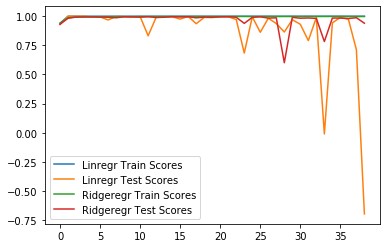

In [18]:
# plt.plot() calls here
plt.plot(linregrTrainScores, label='Linregr Train Scores')
plt.plot(linregrTestScores, label='Linregr Test Scores')
plt.plot(ridgeregrTrainScores, label='Ridgeregr Train Scores')
plt.plot(ridgeregrTestScores, label='Ridgeregr Test Scores')

plt.legend()
plt.show()

## Finally (1p)

It would be nice if you would answer some questions about this exercises.

What was the amount of time you used for solving the exercise: It took me more than 5 days and per day I was doing 1.5 hours.

What was hard (if anything): Step 4 was little confusing so I took a help from peter. 

Did the exercise make sense. Why / why not: Yes many more things to learn from this excercise like train and test model, fit model, scale, score and etc.  